# Задание 1: Изменение архитектуры сети

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# 1. Загрузка и предобработка данных MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)


# 2. Определение модели с изменяемой архитектурой
class Net(nn.Module):
    def __init__(self, hidden_sizes):
        super(Net, self).__init__()
        layers = []
        input_size = 784
        for size in hidden_sizes:
            layers.append(nn.Linear(input_size, size))
            layers.append(nn.ReLU())
            input_size = size
        layers.append(nn.Linear(input_size, 10))  # Выходной слой
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        x = x.view(-1, 784)  # Преобразование изображения в вектор
        return self.network(x)


# 3. Обучение и тестирование модели
def train_and_evaluate(hidden_sizes, num_epochs=10):
    model = Net(hidden_sizes)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()

    # Обучение модели
    for epoch in range(num_epochs):
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

    # Тестирование модели
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    accuracy = 100 * correct / total
    return accuracy


# 4. Эксперименты с различными архитектурами
results = []

# Архитектура 1: Один скрытый слой с 64 нейронами
accuracy_64 = train_and_evaluate([64])
results.append(("64", accuracy_64))

# Архитектура 2: Один скрытый слой с 256 нейронами
accuracy_256 = train_and_evaluate([256])
results.append(("256", accuracy_256))

# Архитектура 3: Один скрытый слой с 512 нейронами
accuracy_512 = train_and_evaluate([512])
results.append(("512", accuracy_512))

# Архитектура 4: Два скрытых слоя [128, 64]
accuracy_128_64 = train_and_evaluate([128, 64])
results.append(("128, 64", accuracy_128_64))

# Архитектура 5: Два скрытых слоя [256, 128]
accuracy_256_128 = train_and_evaluate([256, 128])
results.append(("256, 128", accuracy_256_128))

# Архитектура 6: Три скрытых слоя [512, 256, 128]
accuracy_512_256_128 = train_and_evaluate([512, 256, 128])
results.append(("512, 256, 128", accuracy_512_256_128))

# 5. Вывод результатов
print("Архитектура\tТочность (%)")
for arch, acc in results:
    print(f"{arch}\t\t\t{acc:.2f}")

Архитектура	Точность (%)
64			97.15
256			97.83
512			97.90
128, 64			97.41
256, 128			97.64
512, 256, 128			97.84


# Задание 2: Эксперименты с функциями активации

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# 1. Загрузка и предобработка данных MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)


# 2. Определение модели с изменяемой функцией активации
class Net(nn.Module):
    def __init__(self, activation_fn):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 128)  # Полносвязный слой 784 -> 128
        self.activation = activation_fn  # Функция активации
        self.fc2 = nn.Linear(128, 10)  # Полносвязный слой 128 -> 10

    def forward(self, x):
        x = x.view(-1, 784)  # Преобразование изображения в вектор
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x


# 3. Обучение и тестирование модели
def train_and_evaluate(activation_fn, num_epochs=10):
    model = Net(activation_fn)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()

    # Обучение модели
    for epoch in range(num_epochs):
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

    # Тестирование модели
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    accuracy = 100 * correct / total
    return accuracy


# 4. Эксперименты с различными функциями активации
activations = {
    "ReLU": nn.ReLU(),
    "Sigmoid": nn.Sigmoid(),
    "Tanh": nn.Tanh(),
    "ELU": nn.ELU(),
}

results = []

for name, activation_fn in activations.items():
    accuracy = train_and_evaluate(activation_fn)
    results.append((name, accuracy))

# 5. Вывод результатов
print("Функция активации\tТочность (%)")
for name, acc in results:
    print(f"{name}\t{acc:.2f}")

Функция активации	Точность (%)
ReLU	97.69
Sigmoid	97.62
Tanh	97.39
ELU	97.69


# Задание 3: Оптимизаторы

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# 1. Загрузка и предобработка данных MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)


# 2. Определение модели
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 128)  # Полносвязный слой 784 -> 128
        self.relu = nn.ReLU()  # Функция активации ReLU
        self.fc2 = nn.Linear(128, 10)  # Полносвязный слой 128 -> 10

    def forward(self, x):
        x = x.view(-1, 784)  # Преобразование изображения в вектор
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


# 3. Обучение и тестирование модели
def train_and_evaluate(optimizer_class, optimizer_params, num_epochs=10):
    model = Net()
    optimizer = optimizer_class(model.parameters(), **optimizer_params)
    criterion = nn.CrossEntropyLoss()

    # Обучение модели
    for epoch in range(num_epochs):
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

    # Тестирование модели
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    accuracy = 100 * correct / total
    return accuracy


# 4. Эксперименты с различными оптимизаторами
optimizers = {
    "Adam": (optim.Adam, {"lr": 0.001}),
    "SGD": (optim.SGD, {"lr": 0.01, "momentum": 0.9}),
    "RMSprop": (optim.RMSprop, {"lr": 0.001, "alpha": 0.99}),
    "Adagrad": (optim.Adagrad, {"lr": 0.01}),
}

results = []

for name, (optimizer_class, params) in optimizers.items():
    accuracy = train_and_evaluate(optimizer_class, params)
    results.append((name, accuracy))

# 5. Вывод результатов
print("Оптимизатор\tТочность (%)")
for name, acc in results:
    print(f"{name}\t{acc:.2f}")

Оптимизатор	Точность (%)
Adam	97.93
SGD	97.95
RMSprop	97.76
Adagrad	97.49


# Задание 4: Оценка качества обучения и борьба с переобучением

Experiment with batch size: 16
Epoch 1: Train Loss: 0.3625, Val Loss: 0.1612, Train Acc: 88.89%, Val Acc: 95.23%
Epoch 2: Train Loss: 0.2519, Val Loss: 0.1273, Train Acc: 92.44%, Val Acc: 96.26%
Epoch 3: Train Loss: 0.2234, Val Loss: 0.1109, Train Acc: 93.19%, Val Acc: 96.57%
Epoch 4: Train Loss: 0.2031, Val Loss: 0.1096, Train Acc: 93.86%, Val Acc: 96.92%
Epoch 5: Train Loss: 0.1926, Val Loss: 0.1228, Train Acc: 94.12%, Val Acc: 96.76%
Epoch 6: Train Loss: 0.1845, Val Loss: 0.1003, Train Acc: 94.50%, Val Acc: 97.00%
Epoch 7: Train Loss: 0.1797, Val Loss: 0.1089, Train Acc: 94.53%, Val Acc: 96.84%
Epoch 8: Train Loss: 0.1716, Val Loss: 0.1073, Train Acc: 94.62%, Val Acc: 96.95%
Epoch 9: Train Loss: 0.1690, Val Loss: 0.1030, Train Acc: 94.86%, Val Acc: 97.25%
Early stopping at epoch 9


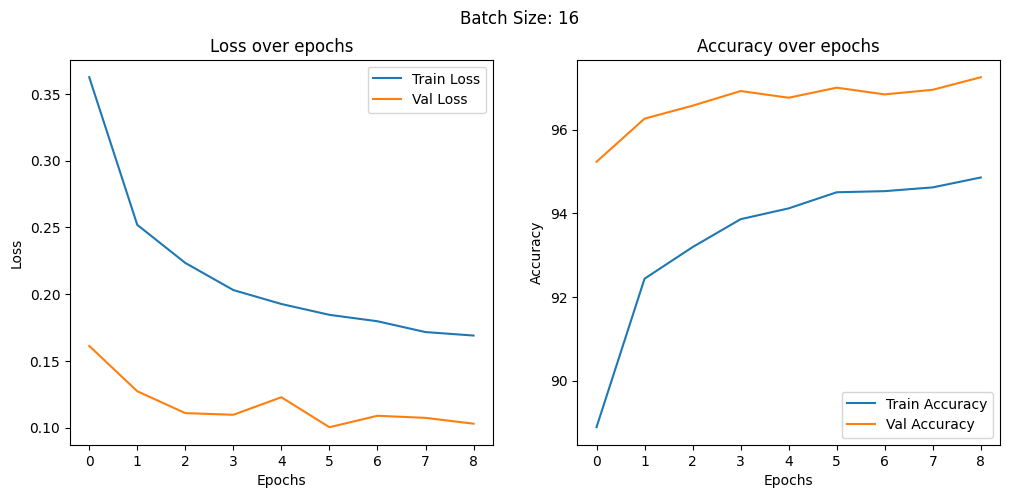

Experiment with batch size: 64
Epoch 1: Train Loss: 0.3877, Val Loss: 0.1631, Train Acc: 88.26%, Val Acc: 94.95%
Epoch 2: Train Loss: 0.2271, Val Loss: 0.1229, Train Acc: 93.16%, Val Acc: 96.13%
Epoch 3: Train Loss: 0.1926, Val Loss: 0.1068, Train Acc: 94.16%, Val Acc: 96.80%
Epoch 4: Train Loss: 0.1762, Val Loss: 0.1012, Train Acc: 94.70%, Val Acc: 96.92%
Epoch 5: Train Loss: 0.1629, Val Loss: 0.0925, Train Acc: 95.06%, Val Acc: 97.20%
Epoch 6: Train Loss: 0.1545, Val Loss: 0.0929, Train Acc: 95.23%, Val Acc: 97.11%
Epoch 7: Train Loss: 0.1485, Val Loss: 0.0913, Train Acc: 95.46%, Val Acc: 97.28%
Epoch 8: Train Loss: 0.1405, Val Loss: 0.0893, Train Acc: 95.59%, Val Acc: 97.41%
Epoch 9: Train Loss: 0.1335, Val Loss: 0.0845, Train Acc: 95.84%, Val Acc: 97.62%
Epoch 10: Train Loss: 0.1288, Val Loss: 0.0873, Train Acc: 95.85%, Val Acc: 97.50%
Epoch 11: Train Loss: 0.1259, Val Loss: 0.0791, Train Acc: 96.05%, Val Acc: 97.69%
Epoch 12: Train Loss: 0.1221, Val Loss: 0.0786, Train Acc: 96.18%

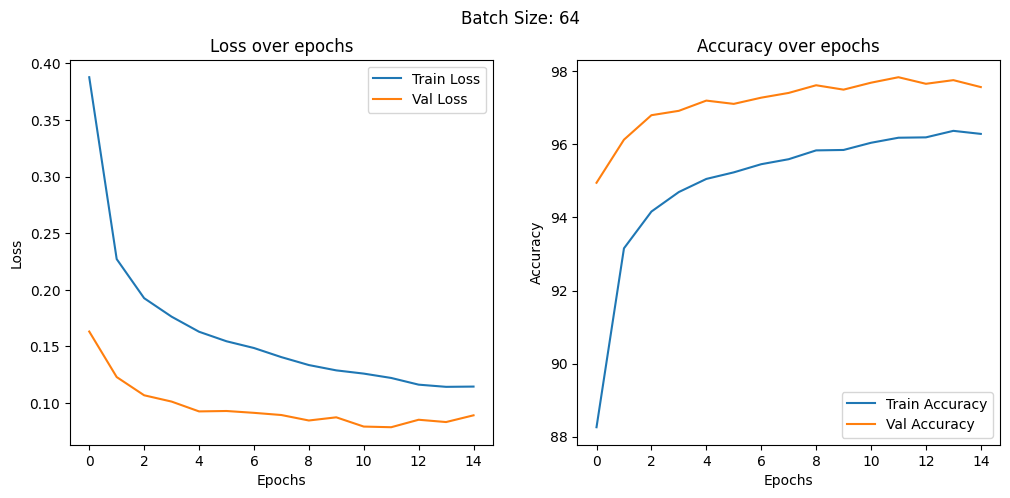

Experiment with batch size: 128
Epoch 1: Train Loss: 0.4284, Val Loss: 0.1836, Train Acc: 87.22%, Val Acc: 94.74%
Epoch 2: Train Loss: 0.2396, Val Loss: 0.1424, Train Acc: 92.92%, Val Acc: 95.71%
Epoch 3: Train Loss: 0.2022, Val Loss: 0.1183, Train Acc: 94.11%, Val Acc: 96.45%
Epoch 4: Train Loss: 0.1831, Val Loss: 0.1070, Train Acc: 94.50%, Val Acc: 96.90%
Epoch 5: Train Loss: 0.1651, Val Loss: 0.1014, Train Acc: 94.97%, Val Acc: 96.99%
Epoch 6: Train Loss: 0.1556, Val Loss: 0.0967, Train Acc: 95.25%, Val Acc: 97.09%
Epoch 7: Train Loss: 0.1490, Val Loss: 0.0920, Train Acc: 95.44%, Val Acc: 97.18%
Epoch 8: Train Loss: 0.1397, Val Loss: 0.0898, Train Acc: 95.74%, Val Acc: 97.32%
Epoch 9: Train Loss: 0.1316, Val Loss: 0.0871, Train Acc: 95.86%, Val Acc: 97.47%
Epoch 10: Train Loss: 0.1306, Val Loss: 0.0862, Train Acc: 95.94%, Val Acc: 97.55%
Epoch 11: Train Loss: 0.1270, Val Loss: 0.0843, Train Acc: 95.98%, Val Acc: 97.72%
Epoch 12: Train Loss: 0.1238, Val Loss: 0.0883, Train Acc: 96.09

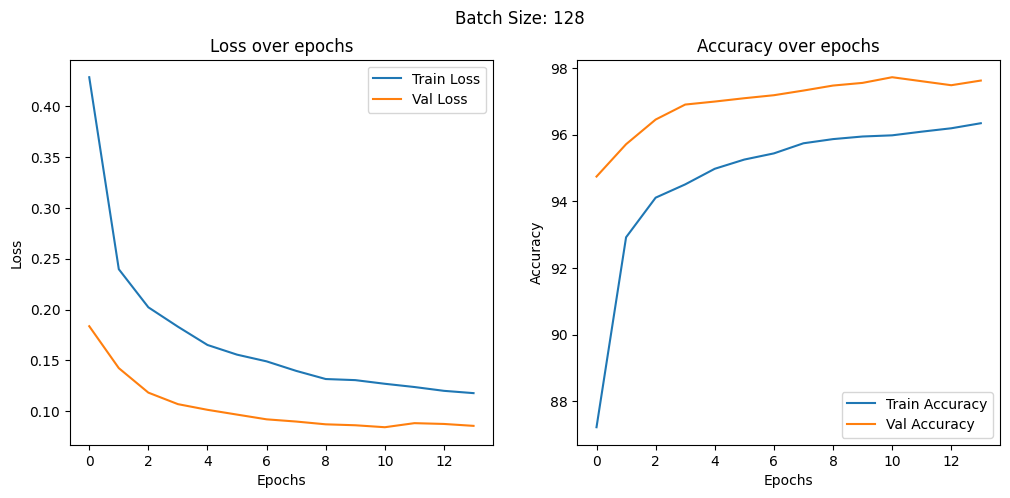

Experiment with batch size: 256
Epoch 1: Train Loss: 0.4911, Val Loss: 0.2147, Train Acc: 85.28%, Val Acc: 93.65%
Epoch 2: Train Loss: 0.2655, Val Loss: 0.1593, Train Acc: 92.15%, Val Acc: 95.23%
Epoch 3: Train Loss: 0.2170, Val Loss: 0.1347, Train Acc: 93.67%, Val Acc: 95.95%
Epoch 4: Train Loss: 0.1899, Val Loss: 0.1216, Train Acc: 94.40%, Val Acc: 96.28%
Epoch 5: Train Loss: 0.1707, Val Loss: 0.1026, Train Acc: 94.90%, Val Acc: 96.90%
Epoch 6: Train Loss: 0.1570, Val Loss: 0.0975, Train Acc: 95.36%, Val Acc: 97.14%
Epoch 7: Train Loss: 0.1501, Val Loss: 0.0962, Train Acc: 95.51%, Val Acc: 97.12%
Epoch 8: Train Loss: 0.1406, Val Loss: 0.0885, Train Acc: 95.73%, Val Acc: 97.43%
Epoch 9: Train Loss: 0.1370, Val Loss: 0.0881, Train Acc: 95.81%, Val Acc: 97.33%
Epoch 10: Train Loss: 0.1305, Val Loss: 0.0862, Train Acc: 96.00%, Val Acc: 97.46%
Epoch 11: Train Loss: 0.1242, Val Loss: 0.0856, Train Acc: 96.14%, Val Acc: 97.38%
Epoch 12: Train Loss: 0.1196, Val Loss: 0.0821, Train Acc: 96.26

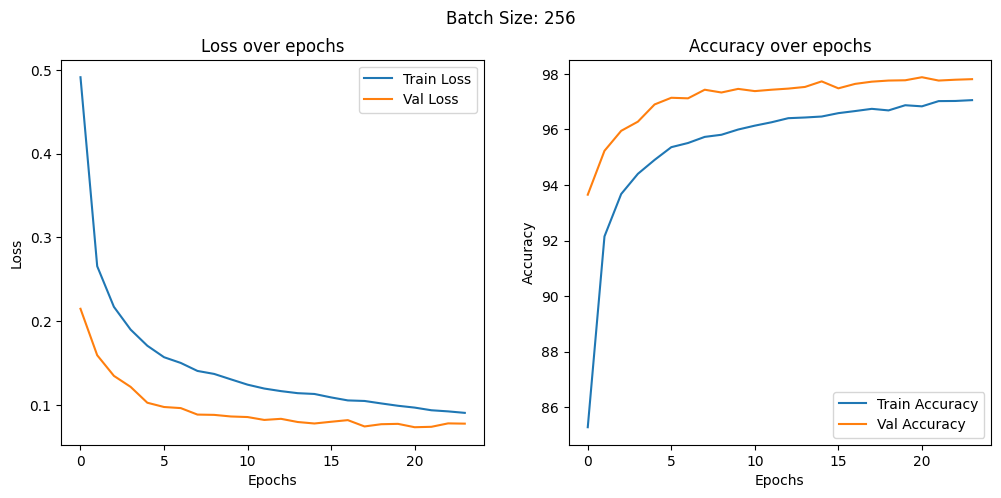

Batch Size	Final Train Accuracy	Final Val Accuracy
16	94.86%	97.25%
64	96.29%	97.57%
128	96.34%	97.62%
256	97.06%	97.81%


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# 1. Загрузка и предобработка данных MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

batch_sizes = [16, 64, 128, 256]  # Различные размеры батча для экспериментов


# 2. Определение модели с Dropout
class Net(nn.Module):
    def __init__(self, dropout_rate=0.5):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 128)  # Полносвязный слой 784 -> 128
        self.relu = nn.ReLU()  # Функция активации ReLU
        self.dropout = nn.Dropout(dropout_rate)  # Слой Dropout
        self.fc2 = nn.Linear(128, 10)  # Полносвязный слой 128 -> 10

    def forward(self, x):
        x = x.view(-1, 784)  # Преобразование изображения в вектор
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)  # Применение Dropout
        x = self.fc2(x)
        return x


# 3. Обучение модели с Early Stopping
def train_with_early_stopping(model, optimizer, criterion, train_loader, test_loader, patience=3, max_epochs=50):
    best_val_loss = float('inf')
    patience_counter = 0
    history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}

    for epoch in range(max_epochs):
        # Обучение
        model.train()
        train_loss = 0.0
        correct_train = 0
        total_train = 0
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            total_train += target.size(0)
            correct_train += (predicted == target).sum().item()

        train_loss /= len(train_loader)
        train_accuracy = 100 * correct_train / total_train

        # Валидация
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for data, target in test_loader:
                output = model(data)
                loss = criterion(output, target)
                val_loss += loss.item()
                _, predicted = torch.max(output.data, 1)
                total_val += target.size(0)
                correct_val += (predicted == target).sum().item()

        val_loss /= len(test_loader)
        val_accuracy = 100 * correct_val / total_val

        # Логирование метрик
        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['train_acc'].append(train_accuracy)
        history['val_acc'].append(val_accuracy)

        print(f'Epoch {epoch + 1}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, '
              f'Train Acc: {train_accuracy:.2f}%, Val Acc: {val_accuracy:.2f}%')

        # Early Stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f'Early stopping at epoch {epoch + 1}')
            break

    return history


# 4. Эксперименты
results = []

for batch_size in batch_sizes:
    print(f"Experiment with batch size: {batch_size}")
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

    model = Net(dropout_rate=0.5)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()

    history = train_with_early_stopping(
        model, optimizer, criterion, train_loader, test_loader, patience=3, max_epochs=50
    )

    # Сохранение результатов
    results.append({
        'batch_size': batch_size,
        'final_train_acc': history['train_acc'][-1],
        'final_val_acc': history['val_acc'][-1]
    })

    # Построение графиков
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Val Loss')
    plt.title('Loss over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Train Accuracy')
    plt.plot(history['val_acc'], label='Val Accuracy')
    plt.title('Accuracy over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.suptitle(f'Batch Size: {batch_size}')
    plt.show()

# 5. Вывод результатов
print("Batch Size\tFinal Train Accuracy\tFinal Val Accuracy")
for result in results:
    print(f"{result['batch_size']}\t{result['final_train_acc']:.2f}%\t{result['final_val_acc']:.2f}%")